# **EDA - G2M-insight-for-Cab-Investment-firm by Kazmi**

## **1. Importing Libraries & Data**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('/content/Cabdata/Cab_Data.csv')

In [3]:
data=pd.read_csv('/content/Cabdata/City.csv')
df = data . iloc [ 1 : , :]
df

,City,Population,Users
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"
10,DENVER CO,"754,233","12,421"


In [4]:
# Attribute 'Population' should be an integer
df['Population'] = [x.replace(',','') for x in df['Population']]
df['Users'] = [x.replace(',','') for x in df['Users']]

for column in ["Population", "Users"]:
    df[column] = df[column].astype('float')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        19 non-null     object 
 1   Population  19 non-null     float64
 2   Users       19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 588.0+ bytes


In [6]:
df.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [7]:
data1=pd.read_csv('/content/Cabdata/Customer_ID.csv')
df1 = data1.iloc[ 1 : , :]
df1.head()

,Customer ID,Gender,Age,Income (USD/Month)
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49170 entries, 1 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49170 non-null  int64 
 1   Gender              49170 non-null  object
 2   Age                 49170 non-null  int64 
 3   Income (USD/Month)  49170 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
df1.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [10]:
data2=pd.read_csv('/content/Cabdata/Transaction_ID.csv')
df2 = data2.iloc[ 1 : , :]
df2.head()

,Transaction ID,Customer ID,Payment_Mode
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440097 entries, 1 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440097 non-null  int64 
 1   Customer ID     440097 non-null  int64 
 2   Payment_Mode    440097 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [12]:
df2.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [13]:
data3=pd.read_csv('/content/Cabdata/Cab_Data.csv')
df3 = data3 . iloc [ 1 : , :]
df3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024


In [14]:
df3.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359391 entries, 1 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359391 non-null  int64  
 1   Date of Travel  359391 non-null  int64  
 2   Company         359391 non-null  object 
 3   City            359391 non-null  object 
 4   KM Travelled    359391 non-null  float64
 5   Price Charged   359391 non-null  float64
 6   Cost of Trip    359391 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [16]:
df3.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [17]:
df3['Date of Travel'] = pd.to_datetime(df3['Date of Travel'])
df3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
5,10000016,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,6.06,72.43,63.0240
...,...,...,...,...,...,...,...
359387,10440101,1970-01-01 00:00:00.000043108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,1970-01-01 00:00:00.000043104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [18]:
df3.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

## **2. Data Frames Merging**

In [19]:
dff = df3.merge(df2, on= 'Transaction ID').merge(df1, on ='Customer ID').merge(df, on = 'City')
dff.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
1,10320494,1970-01-01 00:00:00.000043211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0
2,10324737,1970-01-01 00:00:00.000043224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885.0,24701.0
3,10395626,1970-01-01 00:00:00.000043400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885.0,24701.0
4,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885.0,24701.0
5,10079404,1970-01-01 00:00:00.000042634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885.0,24701.0
6,10186994,1970-01-01 00:00:00.000042909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885.0,24701.0
7,10320493,1970-01-01 00:00:00.000043211,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,28712,Cash,Male,53,11242,814885.0,24701.0
8,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885.0,24701.0
9,10094994,1970-01-01 00:00:00.000042670,Pink Cab,ATLANTA GA,41.44,522.14,484.8480,28020,Cash,Male,23,23327,814885.0,24701.0


In [20]:
dff.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,2.595040e+05,259504.000000,259504.000000,259504.000000,259504.000000,259504.000000,259504.000000,2.595040e+05,259504.000000
mean,1.021886e+07,22.587635,366.955096,284.626449,25999.990964,35.426175,14996.546496,1.102362e+06,103023.831517
std,1.267571e+05,12.244170,219.025050,157.358737,21080.695890,12.666391,7993.114714,6.291845e+05,55364.688661
min,1.000001e+07,1.900000,15.600000,19.000000,3001.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.010926e+07,12.000000,186.760000,150.480000,6516.000000,25.000000,8335.750000,4.188590e+05,69995.000000
50%,1.021798e+07,22.440000,348.765000,280.348800,18906.000000,33.000000,14593.000000,9.593070e+05,127001.000000
75%,1.032931e+07,32.980000,518.842500,411.264000,51795.000000,42.000000,21006.000000,1.595037e+06,144132.000000
max,1.044011e+07,48.000000,1993.830000,691.200000,60000.000000,65.000000,35000.000000,1.955130e+06,164468.000000


## **2.1 Data Preprocessing**

In [21]:
dff.shape

(259504, 14)

In [22]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259504 entries, 0 to 259503
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      259504 non-null  int64         
 1   Date of Travel      259504 non-null  datetime64[ns]
 2   Company             259504 non-null  object        
 3   City                259504 non-null  object        
 4   KM Travelled        259504 non-null  float64       
 5   Price Charged       259504 non-null  float64       
 6   Cost of Trip        259504 non-null  float64       
 7   Customer ID         259504 non-null  int64         
 8   Payment_Mode        259504 non-null  object        
 9   Gender              259504 non-null  object        
 10  Age                 259504 non-null  int64         
 11  Income (USD/Month)  259504 non-null  int64         
 12  Population          259504 non-null  float64       
 13  Users               259504 no

In [23]:
dff

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
1,10320494,1970-01-01 00:00:00.000043211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0
2,10324737,1970-01-01 00:00:00.000043224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885.0,24701.0
3,10395626,1970-01-01 00:00:00.000043400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885.0,24701.0
4,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259499,10307228,1970-01-01 00:00:00.000043162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127001.0
259500,10319775,1970-01-01 00:00:00.000043203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127001.0
259501,10347676,1970-01-01 00:00:00.000043287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127001.0
259502,10358624,1970-01-01 00:00:00.000043314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127001.0


In [24]:
dff.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [25]:
dff.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA',
       'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ',
       'WASHINGTON DC'], dtype=object)

**Figures below give us a better understanding of our dataset.**

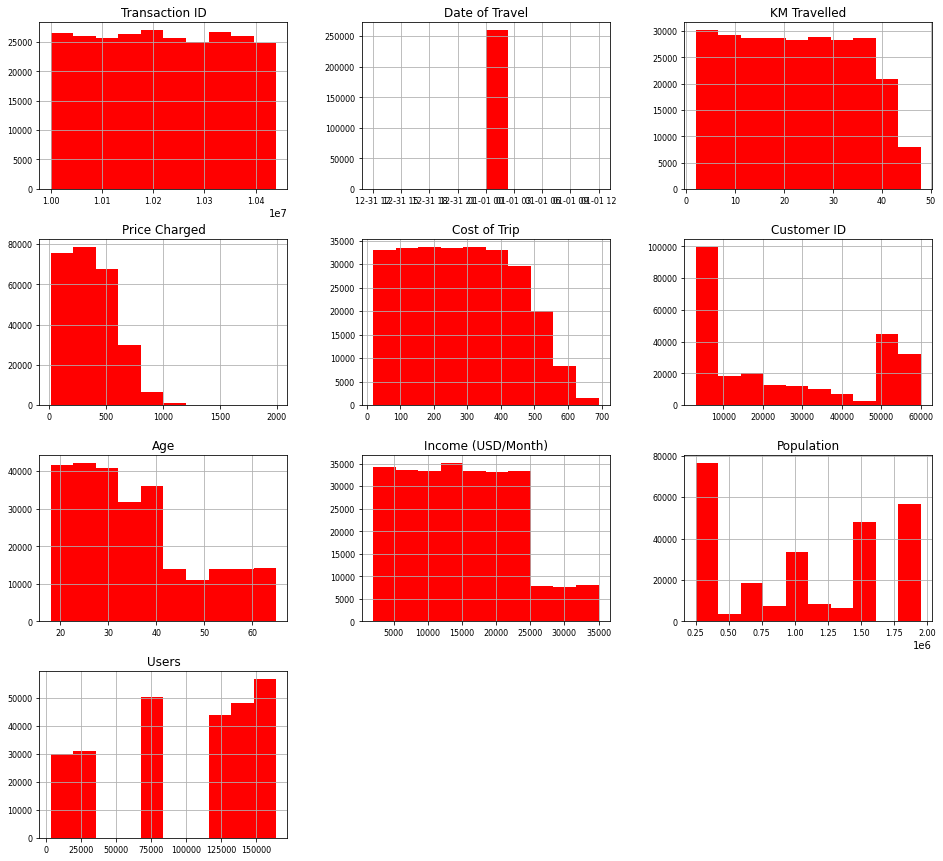

In [26]:
dff.hist(figsize=(16, 15), xlabelsize=8, ylabelsize=8, color = "red")
plt.show()

## **3. Data Correlation**

In [27]:
correlation = dff.corr()
correlation

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001308,-0.059716,-0.003753,-0.005864,-0.002277,-0.003621,0.000247,-0.019769
KM Travelled,-0.001308,1.000000,0.909521,0.980589,-0.001334,-0.002006,-0.001099,0.002591,0.004959
Price Charged,-0.059716,0.909521,1.000000,0.924681,-0.006836,-0.002270,-0.002097,-0.008175,-0.039324
Cost of Trip,-0.003753,0.980589,0.924681,1.000000,0.015881,-0.001722,-0.001555,-0.004548,0.024154
Customer ID,-0.005864,-0.001334,-0.006836,0.015881,1.000000,-0.014701,-0.011257,-0.957356,-0.374125
Age,-0.002277,-0.002006,-0.002270,-0.001722,-0.014701,1.000000,0.003446,0.016594,0.010557
Income (USD/Month),-0.003621,-0.001099,-0.002097,-0.001555,-0.011257,0.003446,1.000000,0.010351,0.002766
Population,0.000247,0.002591,-0.008175,-0.004548,-0.957356,0.016594,0.010351,1.000000,0.565527
Users,-0.019769,0.004959,-0.039324,0.024154,-0.374125,0.010557,0.002766,0.565527,1.000000


**Correlation shows Kms traveeled is directly related with cost of the trip and price charged.**

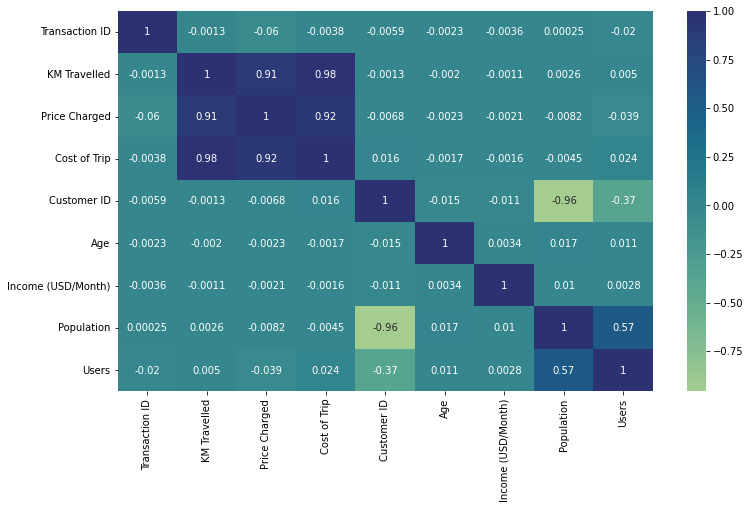

In [28]:
plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

In [29]:
for column in dff.columns:
    if ' ' in column:
        dff = dff.rename(columns={column:column.replace(' ','_')})

In [30]:
for column in dff.columns:
    if ',' in column:
        dff = dff.rename(columns={column:column.replace(',','')})

In [31]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259504 entries, 0 to 259503
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      259504 non-null  int64         
 1   Date_of_Travel      259504 non-null  datetime64[ns]
 2   Company             259504 non-null  object        
 3   City                259504 non-null  object        
 4   KM_Travelled        259504 non-null  float64       
 5   Price_Charged       259504 non-null  float64       
 6   Cost_of_Trip        259504 non-null  float64       
 7   Customer_ID         259504 non-null  int64         
 8   Payment_Mode        259504 non-null  object        
 9   Gender              259504 non-null  object        
 10  Age                 259504 non-null  int64         
 11  Income_(USD/Month)  259504 non-null  int64         
 12  Population          259504 non-null  float64       
 13  Users               259504 no

## **3.1 Cab Users in Various Cities**

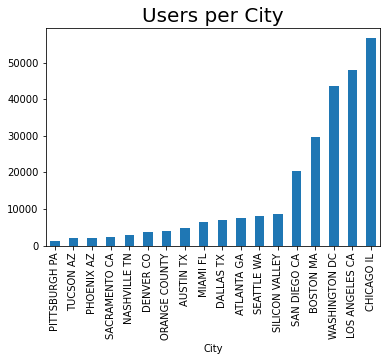

In [32]:
dff.groupby('City').size().sort_values(ascending = True).plot(kind = 'bar')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(18,8)
plt.title('Users per City',fontsize=20)
plt.show()

## **3.2 Market Shared by Yellow & Pink Cabs**

In [33]:
share =dff.groupby('Company')
avg_share = share.Users.mean()
index = avg_share.index
value = avg_share.values 
print(avg_share)

Company
Pink Cab       90733.833793
Yellow Cab    107629.821679
Name: Users, dtype: float64


In [34]:
user_sex = dff.groupby(['Company','Gender'])
user_sex = user_sex['Customer_ID'].nunique()
print(user_sex)

Company     Gender
Pink Cab    Female    13645
            Male      15712
Yellow Cab  Female    17212
            Male      19683
Name: Customer_ID, dtype: int64


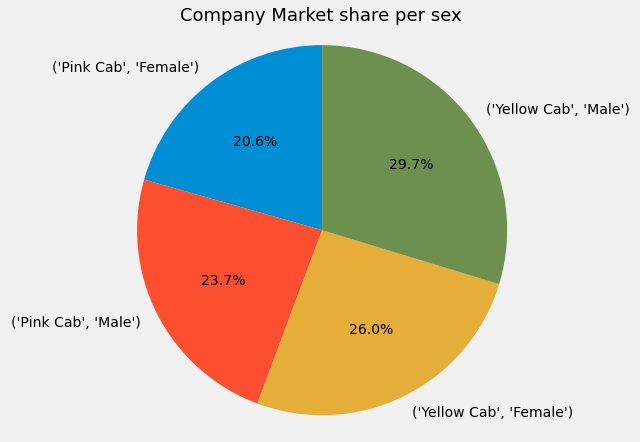

In [35]:
labs = user_sex.index
vals = user_sex.values
figp, ax = plt.subplots(figsize=(10,7))
ax.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Company Market share per sex', fontsize = 18)
plt.show()

In [36]:
city_users = dff.groupby('City').Users.count()
city_users

City
ATLANTA GA         7554
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

## **3.3 Price Charged w.r.t Distance Travelled**

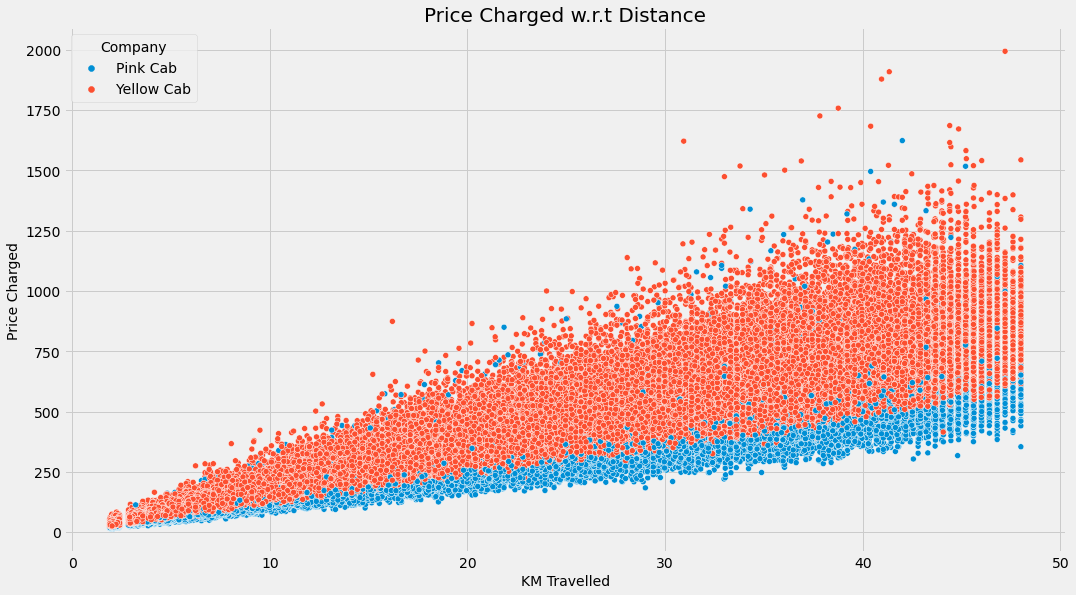

In [37]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=dff, x="KM_Travelled", y='Price_Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

## **3.4 Pink Cab Dominant Cities**

In [42]:
pink_cities = dff[dff.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
pink_cities

City
ATLANTA GA         1761
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

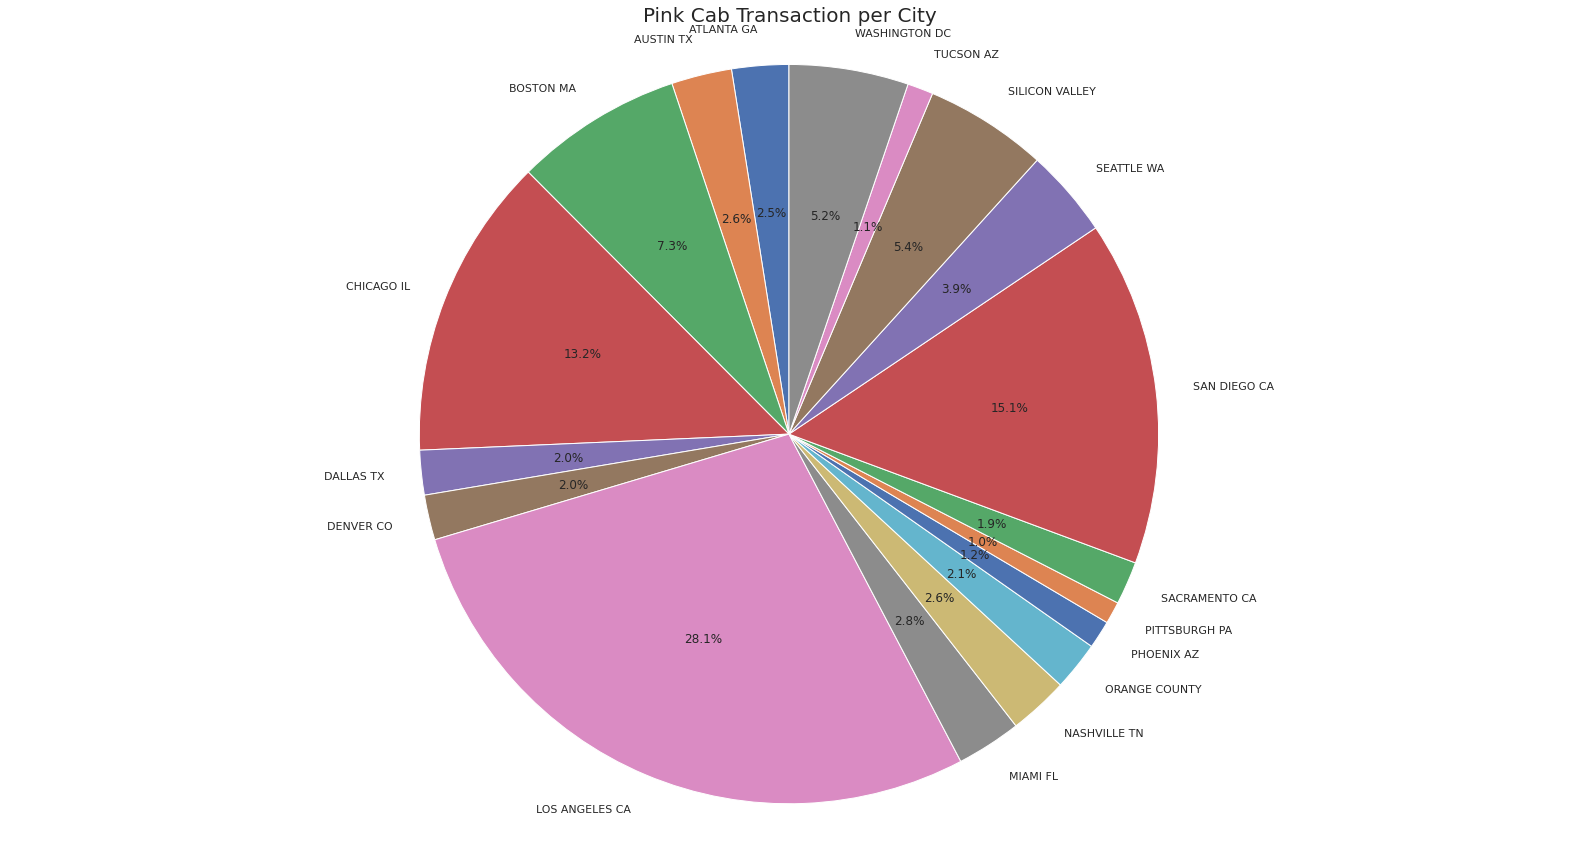

In [50]:
labs = pink_cities.index
vals = pink_cities.values
figp, ax = plt.subplots(figsize=(25,15))
ax.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
ax.axis('equal')

plt.title('Pink Cab Transaction per City', fontsize =20)
plt.show()

## **3.4.1 Yellow Cab Dominant Cities**

In [51]:
yellow_cities = dff[dff.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
yellow_cities

City
ATLANTA GA         5793
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

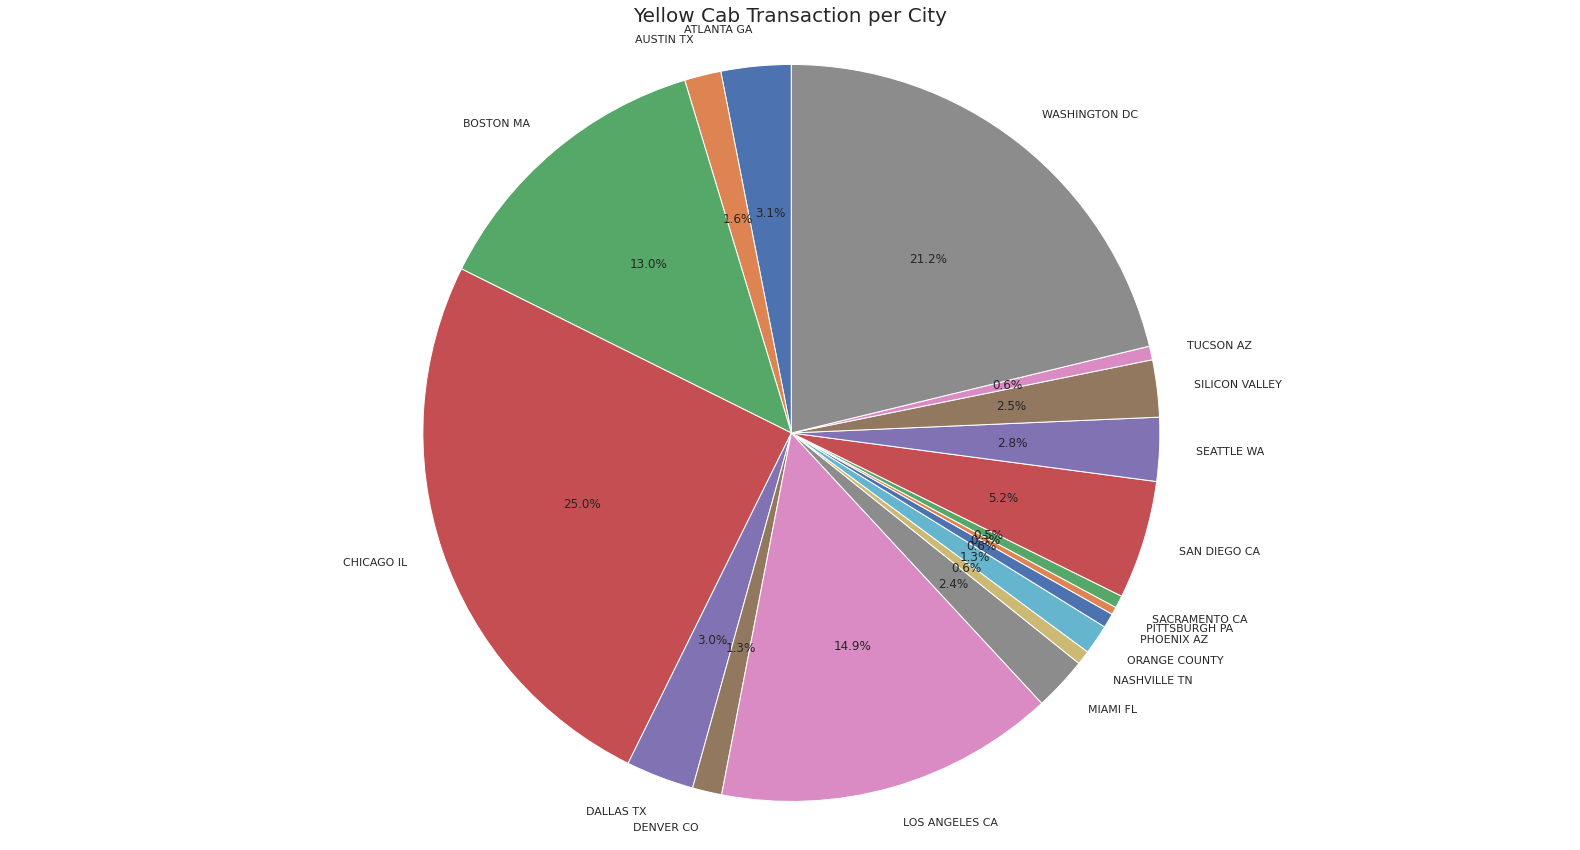

In [52]:
labs = yellow_cities.index
vals = yellow_cities.values
figp, ax = plt.subplots(figsize=(25,15))
ax.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
ax.axis('equal')

plt.title('Yellow Cab Transaction per City', fontsize =20)
plt.show()

## **3.5 Company's Charged Prices**

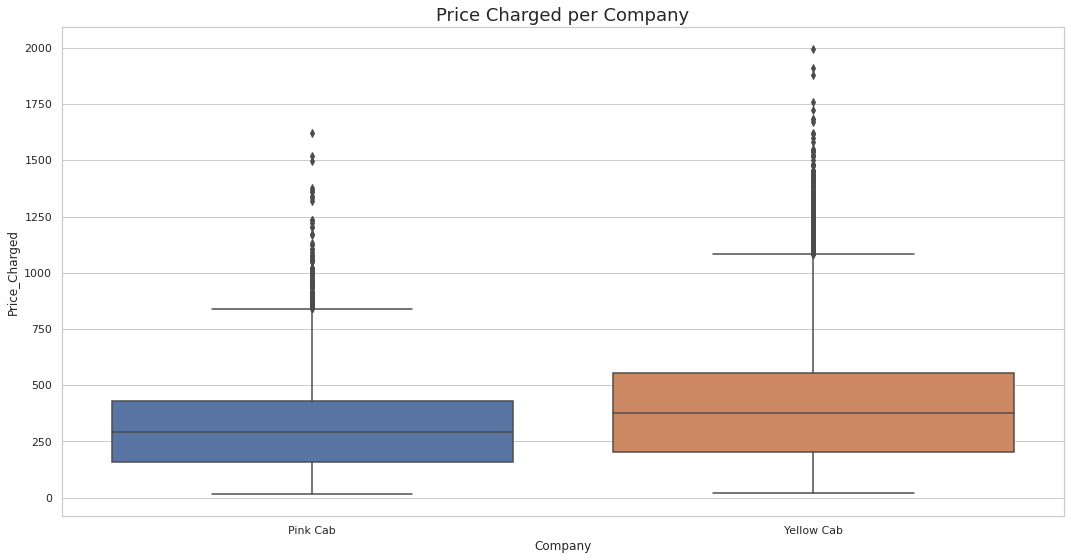

In [40]:
sns.set(style = 'whitegrid')

plt.figure(figsize = (16, 9))

sns.boxplot(dff['Company'], dff['Price_Charged'])
plt.title('Price Charged per Company', fontsize=18)
plt.show()

## **3.6 Payment Gateways Used**

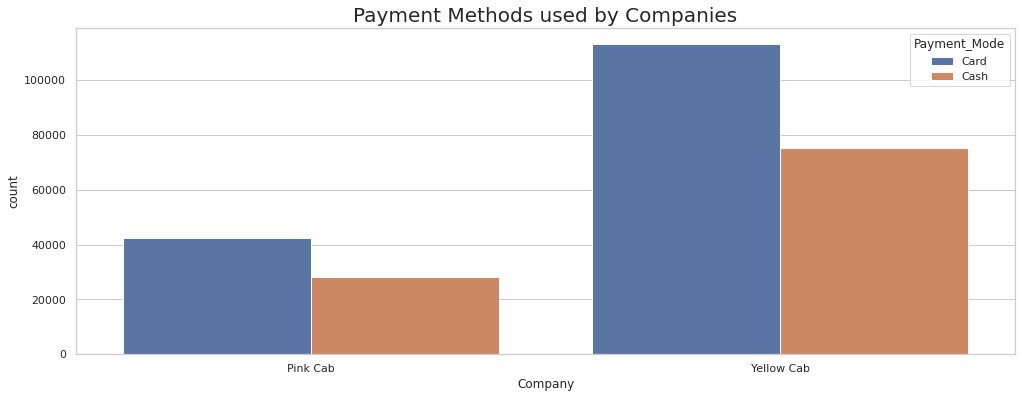

In [41]:
plt.figure(figsize = (15, 6))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=dff)
plt.title('Payment Methods used by Companies', fontsize=20)
plt.show()

## **3.7 Frequency of Distance Travelled by Both Companies**

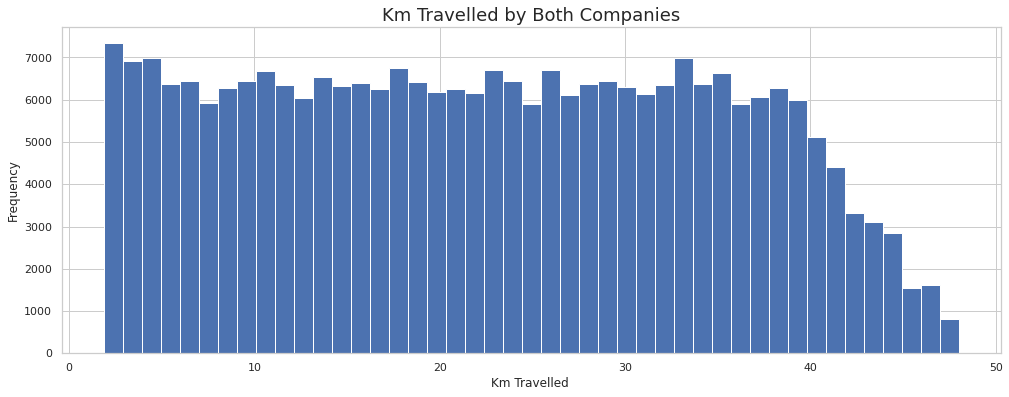

In [53]:
plt.figure(figsize = (15, 6))
plt.hist(dff['KM_Travelled'], bins = 45)
plt.title('Km Travelled by Both Companies', fontsize=18)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled ')
plt.show()

## **3.8 Profit Margins**

In [54]:
company = dff.groupby('Company')
price_charged = company['Price_Charged'].mean()
cost_trip = company['Cost_of_Trip'].mean()
netcost = cost_trip.index
netvalue = cost_trip.values
charged = price_charged.values

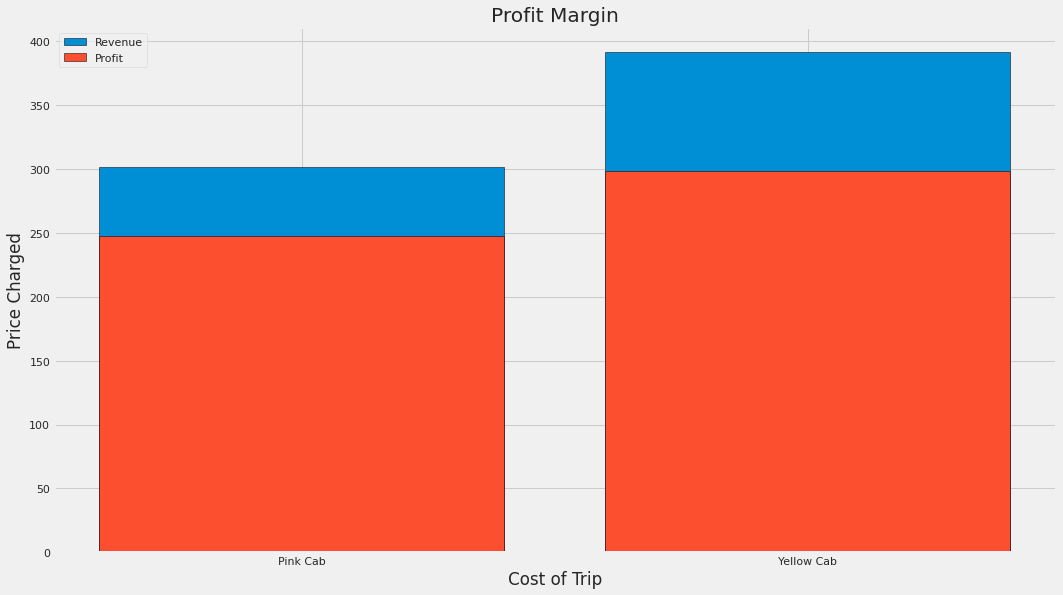

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(netcost, charged, edgecolor='black', label="Revenue")
plt.bar(netcost, netvalue, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

# **4. Hypothesis**

### **1. Difference in Margins due to Payment Methods Usage**

In [62]:
dff['Profit'] = (dff['Price_Charged']-dff['Cost_of_Trip'])

In [70]:
a = dff[(dff['Payment_Mode']=='Cash')&(dff.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = dff[(dff['Payment_Mode']=='Card')&(dff.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment method for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment method for Pink Cab')

P value is  0.749633836217162
We accept null hypothesis (H0) that there is no difference in payment method for Pink Cab


In [71]:
a = dff[(dff['Payment_Mode']=='Cash')&(dff.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = dff[(dff['Payment_Mode']=='Card')&(dff.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment method for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment method for Yellow Cab')

P value is  0.461788980409369
We accept null hypothesis (H0) that there is no difference in payment method for Yellow Cab


### **2. Age difference in Profit Calculations**

In [67]:
a = dff[(dff.Age <= 60)&(dff.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = dff[(dff.Age >= 60)&(dff.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

66794 4634
P value is  0.8838335537333307
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [68]:
a = dff[(dff.Age <= 60)&(dff.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = dff[(dff.Age >= 60)&(dff.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

178583 12110
P value is  0.026821418125176685
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


# **End**